# 台股量化分析練習場

- 抓取每日價格
- 抓取財報（季/月)
- 簡易回測

In [2]:
%matplotlib inline
import requests
import pandas as pd 
from io import StringIO
import numpy as np

## 每日價

In [2]:
r = requests.post('http://app.twse.com.tw/ch/trading/exchange/MI_INDEX/MI_INDEX.php', data={
    'download': 'csv',
    'qdate':'107/01/03',
    'selectType':'ALL',
})

In [10]:
r.encoding = 'cp950'


In [59]:
df_stocks = pd.read_csv(StringIO("\n".join([
    i.translate({ord(c):None for c in ' '}) for i in r.text.split('\n')
    if len(i.split('",')) == 16 and i[0] != '='
])))


In [61]:
df_stocks.head()

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,1101,台泥,19915000,4868,735683200,36.5,37.35,36.25,37.35,+,0.80,37.3,11,37.35,445,20.41
1,1102,亞泥,7096000,2247,200596550,28.3,28.4,28.1,28.4,+,0.20,28.35,3,28.4,25,17.75
2,1103,嘉泥,603000,190,8036600,13.45,13.45,13.25,13.3,-,0.15,13.3,29,13.35,23,83.13
3,1104,環泥,330000,129,7593350,23,23.05,22.9,23,NaN,0.00,22.95,13,23,6,9.96
4,1108,幸福,288000,76,2412320,8.4,8.4,8.35,8.35,-,0.05,8.36,5,8.4,17,52.19


* 選股

In [79]:
df_stocks[(df_stocks['成交筆數']>1000)& (df_stocks['本益比'] < 15)]

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
19,1229,聯華,6928000,2753,259394200,36.35,37.9,36.35,37.9,+,1.55,37.85,12,37.9,128,12.94
27,1262,綠悅-KY,1554000,1011,101166200,65.3,65.8,64.5,65.1,-,0.10,64.9,1,65.1,2,8.22
28,1301,台塑,6430000,3909,630652400,98.1,98.5,97.7,98.5,+,0.40,98.2,24,98.5,64,12.91
29,1303,南亞,6662000,3154,518823600,77.2,78.2,77,78.2,+,1.20,78.1,28,78.2,231,9.81
31,1305,華夏,4195000,1998,137059650,33.05,33.1,32.4,32.75,-,0.20,32.7,45,32.75,2,10.88
34,1309,台達化,6970000,1956,107045150,15.3,15.6,15.1,15.6,+,0.40,15.55,66,15.6,22,14.18
35,1310,台苯,7273000,2740,163483650,22.75,22.8,22.35,22.5,-,0.15,22.5,54,22.55,77,9.22
36,1312,國喬,25925000,9340,790708250,31.2,31.2,30.2,30.35,-,0.45,30.35,36,30.4,24,8.93
38,1313,聯成,3593000,1446,67930350,19.05,19.05,18.8,18.8,-,0.10,18.8,1,18.85,52,9.40
39,1314,中石化,115957000,17418,1841879450,15.55,16.1,15.5,15.7,+,0.30,15.7,719,15.75,321,8.82


## 月營收

In [80]:
url = 'http://mops.twse.com.tw/nas/t21/sii/t21sc03_103_2_0.html'

df_rev = pd.read_html(url)

In [217]:
def monthly_report(year,month,typeK='sii'):    
    """公司每月營收
    ====
    year : (str)
        民國年 / 西元年
    month : (str)
        1,2,...,12
    typeK : (str) 
        sii -- 上市
        otc -- 上櫃       
    ====
    return : df
    
    """
    if year > 1900:
        year -= 1911
        
    ## 下載該年月營收網站，並轉為dataframe
    url = 'http://mops.twse.com.tw/nas/t21/'+ typeK + '/t21sc03_'+str(year)+'_'+str(month)+'_0.html'
    res = requests.get(url)
    res.encoding='cp950'
    html_df = pd.read_html(res.text)    
    
    # 處理一下資料
    if html_df[0].shape[0] > 500:
        df = html_df[0].copy()
    else:
        df = pd.concat([df for df in html_df if df.shape[1] in (10,11)])
    df = df[list(range(0,10))]
    column_index = df.index[(df[0] == '公司代號')][0]
    df.columns = df.iloc[column_index]
    df['當月營收'] = pd.to_numeric(df['當月營收'], 'coerce')
    df = df[~df['當月營收'].isnull()]
    df = df[df['公司代號'] != '合計']
    return df

In [206]:
monthly_report(2010,1,typeK='otc')

1,公司代號,公司名稱,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%)
2,4205,恆義公司,94547.0,104876,109683,-9.84,-13.79,94547,109683,-13.79
3,4207,環泰企業,106749.0,127997,71866,-16.60,48.53,106749,71866,48.53
4,4712,南璋,14496.0,14024,6475,3.36,123.87,14496,6475,123.87
2,4303,信立,34626.0,42801,16407,-19.10,111.04,34626,16407,111.04
3,4304,勝昱,36344.0,33802,19496,7.52,86.41,36344,19496,86.41
4,4305,世坤塑膠,111776.0,125109,54596,-10.65,104.73,111776,54596,104.73
5,6508,惠光,133854.0,172213,77063,-22.27,73.69,133854,77063,73.69
6,8354,冠郝企業,89818.0,92556,46147,-2.95,94.63,89818,46147,94.63
7,9950,萬國通路,169014.0,220054,185906,-23.19,-9.08,169014,185906,-9.08
2,4401,東隆興業,251292.0,268967,122223,-6.57,105.60,251292,122223,105.60


### 上市月報

In [9]:
import itertools

years = list(range(2010,2018))
months = list(range(1,13))
df_list = []
df_all = pd.DataFrame()
for year,month in itertools.product(years,months):
    df_temp = monthly_report(year,month)    
    month_str = '0' + str(month) if month <10 else str(month)
    df_temp['yyyymmdd'] = pd.to_datetime(str(year) + month_str + '10')    
    df_list.append(df_temp)
    print('yyyymmdd:{} done...'.format(str(year)+month_str))


處理資料結構`dtypes`

In [118]:

df_all = df_all.replace('不適用',np.nan)

In [121]:
df_all.dtypes

公司代號                 object
公司名稱                 object
當月營收                float64
上月營收                 object
去年當月營收               object
上月比較增減(%)            object
去年同月增減(%)            object
當月累計營收               object
去年累計營收               object
前期比較增減(%)            object
yyyymmdd     datetime64[ns]
dtype: object

In [123]:
df_all.iloc[:,2:-1] = df_all.iloc[:,2:-1].astype(float)

In [125]:
df_all.head()

,公司代號,公司名稱,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%),yyyymmdd
2,1101,台泥,2054868.0,1807880.0,1601454.0,13.66,28.31,2054868.0,1601454.0,28.31,2010-01-10
3,1102,亞泥,833884.0,833396.0,896089.0,0.05,-6.94,833884.0,896089.0,-6.94,2010-01-10
4,1103,嘉泥,179828.0,188194.0,207491.0,-4.44,-13.33,179828.0,207491.0,-13.33,2010-01-10
5,1104,環球水泥,283637.0,296829.0,169126.0,-4.44,67.70,283637.0,169126.0,67.70,2010-01-10
6,1108,幸福水泥,256813.0,262175.0,187366.0,-2.04,37.06,256813.0,187366.0,37.06,2010-01-10


In [126]:
df_all.dtypes

公司代號                 object
公司名稱                 object
當月營收                float64
上月營收                float64
去年當月營收              float64
上月比較增減(%)           float64
去年同月增減(%)           float64
當月累計營收              float64
去年累計營收              float64
前期比較增減(%)           float64
yyyymmdd     datetime64[ns]
dtype: object

In [207]:
def insertDataFrameToDb(df,con,tablename):
    """
    df: dataframe to be inserted 
    con: pypyodbc connection
    """
    print('更改pd.nan --> None')
    
    df = df.where(pd.notnull(df), None)
    print('塞入資料...')
    cursor = con.cursor()
    idx = 0
    for row_series in df.iterrows():
        idx += 1
        row_dict = {k:v for k,v in row_series[1].items()}
        col,val = list(zip(*row_dict.items()))
        sql_insert = """INSERT INTO {0}({1}) VALUES ({2})"""
        num_quest = '?' + ',?'*(len(row_dict)-1)
        cols_bracket = ['[' + e +']' for e in col]
        fields = ','.join(cols_bracket)
        sql_insert.format(tablename,fields,num_quest)
                
        try:
            cursor.execute(sql_insert.format(tablename,fields,num_quest),val)
        except pypyodbc.IntegrityError as e:
            print('data exist!!',row_dict)
            continue
        except pypyodbc.DataError as e:
            print('data db schema error',row_dict)
        if idx % 1000 == 0 :
            print('insert {} data'.format(idx))
            cursor.commit()
    cursor.commit()
    print('寫入db完成!!')

刪除重複月報

In [228]:
df_all2 = df_all.drop_duplicates(subset=['公司代號','yyyymmdd'])

In [229]:
df_all2['上市櫃']  = '上市'

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [231]:
df_all2.iloc[:,2:-2] = df_all2.iloc[:,2:-2].astype(float)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [233]:
df_all2.dtypes

公司代號                 object
公司名稱                 object
當月營收                float64
上月營收                float64
去年當月營收              float64
上月比較增減(%)           float64
去年同月增減(%)           float64
當月累計營收              float64
去年累計營收              float64
前期比較增減(%)           float64
yyyymmdd     datetime64[ns]
上市櫃                  object
dtype: object

In [234]:
insertDataFrameToDb(df_all2,con,'twstock_monthly_revenue')

更改pd.nan --> None
塞入資料...
insert 1000 data
insert 2000 data
insert 3000 data
insert 4000 data
insert 5000 data
insert 6000 data
insert 7000 data
insert 8000 data
insert 9000 data
insert 10000 data
insert 11000 data
insert 12000 data
insert 13000 data
insert 14000 data
insert 15000 data
insert 16000 data
insert 17000 data
insert 18000 data
insert 19000 data
insert 20000 data
insert 21000 data
insert 22000 data
insert 23000 data
insert 24000 data
insert 25000 data
insert 26000 data
insert 27000 data
insert 28000 data
insert 29000 data
insert 30000 data
insert 31000 data
insert 32000 data
insert 33000 data
insert 34000 data
insert 35000 data
insert 36000 data
insert 37000 data
insert 38000 data
insert 39000 data
insert 40000 data
insert 41000 data
insert 42000 data
insert 43000 data
insert 44000 data
insert 45000 data
insert 46000 data
insert 47000 data
insert 48000 data
insert 49000 data
insert 50000 data
insert 51000 data
insert 52000 data
insert 53000 data
insert 54000 data
insert 5500

In [199]:
cur = con.cursor()
cur.rollback()

### 上櫃月報
    

In [235]:
import datetime

In [277]:
today = datetime.date.today()
last_month = today.month
last_year = today.year
for i in range(1,12*8+1):
    first_date = datetime.date(day = 1, month = last_month,year=last_year)
    report_date = first_date - datetime.timedelta(days=28)
    year = report_date.year
    month = report_date.month
    last_year, last_month = year, month
    print(year,month)

2017 12
2017 11
2017 10
2017 9
2017 8
2017 7
2017 6
2017 5
2017 4
2017 3
2017 2
2017 1
2016 12
2016 11
2016 10
2016 9
2016 8
2016 7
2016 6
2016 5
2016 4
2016 3
2016 2
2016 1
2015 12
2015 11
2015 10
2015 9
2015 8
2015 7
2015 6
2015 5
2015 4
2015 3
2015 2
2015 1
2014 12
2014 11
2014 10
2014 9
2014 8
2014 7
2014 6
2014 5
2014 4
2014 3
2014 2
2014 1
2013 12
2013 11
2013 10
2013 9
2013 8
2013 7
2013 6
2013 5
2013 4
2013 3
2013 2
2013 1
2012 12
2012 11
2012 10
2012 9
2012 8
2012 7
2012 6
2012 5
2012 4
2012 3
2012 2
2012 1
2011 12
2011 11
2011 10
2011 9
2011 8
2011 7
2011 6
2011 5
2011 4
2011 3
2011 2
2011 1
2010 12
2010 11
2010 10
2010 9
2010 8
2010 7
2010 6
2010 5
2010 4
2010 3
2010 2
2010 1


In [287]:
def getMonthlyReport(numbers,typeK='sii'):
    """取得月報"""
    assert typeK in ('sii','otc'),'typeK須為\'otc\' or \'sii\' '
    df_list = []
    today = datetime.date.today()
    last_year,last_month = today.year, today.month
    for n in range(1,numbers+1):
        first_date = datetime.date(day = 1, month = last_month,year=last_year)
        report_date = first_date - datetime.timedelta(days=28)
        year = report_date.year
        month = report_date.month
        
        try:
            df_temp = monthly_report(year,month,typeK=typeK )    
        except:
            print('error at year:{}..can\'t get data...'.format(str(year)))
        month_str = '0' + str(month) if month <10 else str(month)
        df_temp['yyyymmdd'] = pd.to_datetime(str(year) + month_str + '10')    
        df_list.append(df_temp)
        print('yyyymmdd:{} done...'.format(str(year)+month_str))
        last_year, last_month = year, month
    
    ## 移除重複
    df_tot = pd.concat(df_list)
    df_tot = df_tot.drop_duplicates(subset=['公司代號','yyyymmdd'])
    if typeK == 'sii':        
        df_tot['上市櫃'] = '上市'
    elif typeK =='otc':
        df_tot['上市櫃'] = '上櫃'
    df_tot = df_tot.replace('不適用',np.nan)
    df_tot.iloc[:,2:-2] = df_tot.iloc[:,2:-2].astype(float)
    return df_tot

In [278]:
monthly_report(2009,12,typeK='sii') ## 2009 otc之前沒有資料

1,公司代號,公司名稱,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%)
2,1101,台泥,1807880.0,1563521,1864768,15.62,-3.05,20904115,24300890,-13.97
3,1102,亞泥,833396.0,738877,1030603,12.79,-19.13,9962152,10515471,-5.26
4,1103,嘉泥,188194.0,156693,282014,20.10,-33.26,2273120,2590205,-12.24
5,1104,環球水泥,296829.0,288365,247993,2.93,19.69,3268415,2804933,16.52
6,1108,幸福水泥,262175.0,231253,278903,13.37,-5.99,2824085,3304341,-14.53
7,1109,信大水泥,128347.0,116678,166952,10.00,-23.12,1419216,1832434,-22.55
8,1110,東泥,123543.0,132969,180431,-7.08,-31.52,1637702,1775902,-7.78
2,1201,味全公司,971976.0,1008451,906631,-3.61,7.20,12454761,11586587,7.49
3,1203,味王公司,187221.0,174134,1538681,7.51,-87.83,2726799,3341743,-18.40
4,1210,大成長城,1819559.0,1649760,1873637,10.29,-2.88,20169940,23083624,-12.62


In [279]:
df_otc_monthly = getMonthlyReport(12*8,typeK='otc') ## 2009 之前otc沒有資料

yyyymmdd:201712 done...
yyyymmdd:201711 done...
yyyymmdd:201710 done...
yyyymmdd:201709 done...
yyyymmdd:201708 done...
yyyymmdd:201707 done...
yyyymmdd:201706 done...
yyyymmdd:201705 done...
yyyymmdd:201704 done...
yyyymmdd:201703 done...
yyyymmdd:201702 done...
yyyymmdd:201701 done...
yyyymmdd:201612 done...
yyyymmdd:201611 done...
yyyymmdd:201610 done...
yyyymmdd:201609 done...
yyyymmdd:201608 done...
yyyymmdd:201607 done...
yyyymmdd:201606 done...
yyyymmdd:201605 done...
yyyymmdd:201604 done...
yyyymmdd:201603 done...
yyyymmdd:201602 done...
yyyymmdd:201601 done...
yyyymmdd:201512 done...
yyyymmdd:201511 done...
yyyymmdd:201510 done...
yyyymmdd:201509 done...
yyyymmdd:201508 done...
yyyymmdd:201507 done...
yyyymmdd:201506 done...
yyyymmdd:201505 done...
yyyymmdd:201504 done...
yyyymmdd:201503 done...
yyyymmdd:201502 done...
yyyymmdd:201501 done...
yyyymmdd:201412 done...
yyyymmdd:201411 done...
yyyymmdd:201410 done...
yyyymmdd:201409 done...
yyyymmdd:201408 done...
yyyymmdd:201407 

In [288]:
df_otc_monthly = df_otc_monthly.replace('不適用',np.nan)

df_otc_monthly.iloc[:,2:-2] =df_otc_monthly.iloc[:,2:-2].apply(pd.to_numeric)

In [296]:
df_otc_monthly.head()

,公司代號,公司名稱,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%),yyyymmdd,上市櫃
2,1586,和勤精機,231746.0,210968.0,199243,9.84,16.31,2227668,1934739,15.14,2017-12-10,上櫃
2,4714,永捷,48815.0,38643.0,48038,26.32,1.61,545172,496173,9.87,2017-12-10,上櫃
2,4126,太醫,114565.0,132162.0,131356,-13.31,-12.78,1734971,1689664,2.68,2017-12-10,上櫃
3,4128,中天生技,114152.0,147452.0,123293,-22.58,-7.41,1412807,1521711,-7.15,2017-12-10,上櫃
4,4161,聿新生技,51715.0,40086.0,53509,29.01,-3.35,476395,477330,-0.19,2017-12-10,上櫃


In [300]:
insertDataFrameToDb(df_otc_monthly,con,'twstock_monthly_revenue')

更改pd.nan --> None
塞入資料...
insert 1000 data
insert 2000 data
insert 3000 data
insert 4000 data
insert 5000 data
insert 6000 data
insert 7000 data
insert 8000 data
insert 9000 data
insert 10000 data
insert 11000 data
insert 12000 data
insert 13000 data
insert 14000 data
insert 15000 data
insert 16000 data
insert 17000 data
insert 18000 data
insert 19000 data
insert 20000 data
insert 21000 data
insert 22000 data
insert 23000 data
insert 24000 data
insert 25000 data
insert 26000 data
insert 27000 data
insert 28000 data
insert 29000 data
insert 30000 data
insert 31000 data
insert 32000 data
insert 33000 data
insert 34000 data
insert 35000 data
insert 36000 data
insert 37000 data
insert 38000 data
insert 39000 data
insert 40000 data
insert 41000 data
insert 42000 data
insert 43000 data
insert 44000 data
insert 45000 data
insert 46000 data
insert 47000 data
insert 48000 data
insert 49000 data
insert 50000 data
insert 51000 data
insert 52000 data
insert 53000 data
insert 54000 data
insert 5500

## 季報

In [123]:
## 綜合損益 http://mops.twse.com.tw/mops/web/ajax_t163sb04
url1 = 'http://mops.twse.com.tw/mops/web/ajax_t163sb04'
r = requests.post(url1,{'encodeURIComponent':'1',
                       'step':'1',
                       'firstin':'1',
                       'off':'1',
                       'TYPEK':'sii',
                       'year':'106',
                       'season':'03'})
r.encoding = 'utf8'

In [127]:
dfs = pd.read_html(r.text)
for i,df in enumerate(dfs):
    df.columns = df.iloc[0]
    dfs[i] = df.iloc[1:]

In [146]:
df = pd.concat(dfs).applymap(lambda x: x if x != '--' else np.nan)
df = df[df['公司代號'] != '公司代號']
df = df[~df['公司代號'].isnull()]

In [152]:
df.columns

Index(['上市公司第三季資料', '保險負債準備淨變動', '停業單位損益', '公司代號', '公司名稱', '其他收益及費損淨額',
       '其他綜合損益', '其他綜合損益（淨額）', '其他綜合損益（稅後淨額）', '其他綜合損益（稅後）', '利息以外淨損益',
       '利息以外淨收益', '利息淨收益', '原始認列生物資產及農產品之利益（損失）', '合併前非屬共同控制股權損益',
       '合併前非屬共同控制股權綜合損益淨額', '呆帳費用及保證責任準備提存', '呆帳費用及保證責任準備提存（各項提存）',
       '基本每股盈餘（元）', '已實現銷貨（損）益', '所得稅利益（費用）', '所得稅費用（利益）', '所得稅（費用）利益', '支出',
       '支出及費用', '收入', '收益', '未實現銷貨（損）益', '本期其他綜合損益（稅後淨額）', '本期淨利（淨損）',
       '本期稅後淨利（淨損）', '本期綜合損益總額', '本期綜合損益總額（稅後）', '淨利（損）歸屬於共同控制下前手權益',
       '淨利（損）歸屬於母公司業主', '淨利（損）歸屬於非控制權益', '淨利（淨損）歸屬於共同控制下前手權益',
       '淨利（淨損）歸屬於母公司業主', '淨利（淨損）歸屬於非控制權益', '淨收益', '營業利益', '營業利益（損失）', '營業外損益',
       '營業外收入及支出', '營業成本', '營業收入', '營業毛利（毛損）', '營業毛利（毛損）淨額', '營業費用',
       '生物資產當期公允價值減出售成本之變動利益（損失）', '稅前淨利（淨損）', '綜合損益總額歸屬於共同控制下前手權益',
       '綜合損益總額歸屬於母公司業主', '綜合損益總額歸屬於非控制權益', '繼續營業單位本期淨利（淨損）',
       '繼續營業單位本期稅後淨利（淨損）', '繼續營業單位本期純益（純損）', '繼續營業單位稅前損益', '繼續營業單位稅前淨利（淨損）',
       '繼續營業單位稅前純益（純損）'],
      dtype='object')

In [8]:
def financial_statement(year, season, type='綜合損益彙總表',typeK='sii'):
    """ 季財報
    year : (int)
        民國年/西元年
    season : (str or int)
        1,2,3,4
    type : (str)
        綜合損益彙總表 or 資產負債彙總表 or 營益分析彙總表
    typeK : (str)
        - sii : 上市
        - otc : 上櫃
        
    """
    if year >= 1000:
        year -= 1911
        
    if type == '綜合損益彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb04'
    elif type == '資產負債彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb05'
    elif type == '營益分析彙總表':
        url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb06'
    else:
        print('type does not match')
    r = requests.post(url, {
        'encodeURIComponent':1,
        'step':1,
        'firstin':1,
        'off':1,
        'TYPEK': typeK, #otc:上櫃 , sii:上市
        'year':str(year),
        'season':str(season),
    })
    
    r.encoding = 'utf8'
    dfs = pd.read_html(r.text)
    
    
    for i, df in enumerate(dfs):
        df.columns = df.iloc[0]
        dfs[i] = df.iloc[1:]
        
    df = pd.concat(dfs).applymap(lambda x: x if x != '--' else np.nan)
    df = df[df['公司代號'] != '公司代號']
    df = df[~df['公司代號'].isnull()]
    return df

In [9]:
df_2017_season = financial_statement(2017,3,type='營益分析彙總表',typeK='otc')

In [10]:
df_2017_season.columns

Index(['公司代號', '公司名稱', '合計：共 737 家', '毛利率(%)(營業毛利)/(營業收入)',
       '營業利益率(%)(營業利益)/(營業收入)', '營業收入(百萬元)', '稅前純益率(%)(稅前純益)/(營業收入)',
       '稅後純益率(%)(稅後純益)/(營業收入)'],
      dtype='object')

In [11]:
ids = ['8069','1815']
# columns = ['公司代號']
df_2017_season[df_2017_season['公司代號'].isin(ids)]

,公司代號,公司名稱,合計：共 737 家,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
31,1815,富喬工業,NaN,30.39,17.95,3758.60,15.58,12.96
681,8069,元太科技,NaN,41.11,9.08,11698.72,24.04,18.32


In [54]:
ids = ['1101','1102']
cols = ['公司代號','公司名稱','基本每股盈餘（元）','本期綜合損益總額']
# df_2017_season3[df_2017_season3['公司代號'].isin(ids) ][['公司名稱','基本每股盈餘（元）','本期綜合損益總額']]
df_2017_season3[df_2017_season.公司代號.isin(ids)][cols]

,公司代號,公司名稱,基本每股盈餘（元）,本期綜合損益總額
1,1101,台泥,0.23,151650
2,1102,亞泥,0.08,-2285301


# 選擇

In [165]:
df = financial_statement(106,3,'營益分析彙總表')


In [169]:
df.columns

Index(['公司代號', '公司名稱', '合計：共 869 家', '毛利率(%)(營業毛利)/(營業收入)',
       '營業利益率(%)(營業利益)/(營業收入)', '營業收入(百萬元)', '稅前純益率(%)(稅前純益)/(營業收入)',
       '稅後純益率(%)(稅後純益)/(營業收入)'],
      dtype='object')

In [170]:
df = df.drop(['合計：共 869 家'], axis=1)

In [173]:
df = df.set_index(['公司名稱'])
df

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
公司名稱,,,,,,
台泥,1101,18.16,13.41,68952.11,13.38,10.04
亞泥,1102,13.14,9.26,45349.04,11.53,9.55
嘉泥,1103,15.08,-6.18,1565.23,0.79,-0.73
環球水泥,1104,12.89,4.11,3287.86,32.49,30.60
幸福水泥,1108,7.91,1.54,2592.87,1.16,0.80
信大水泥,1109,19.31,11.26,3743.41,12.34,10.15
東泥,1110,-3.58,-8.54,1141.61,0.44,0.47
味全公司,1201,30.21,0.77,13169.21,2.77,1.35
味王公司,1203,32.37,16.71,4633.52,17.09,12.47


In [177]:
df = df.astype(float)

In [183]:
df['毛利率(%)(營業毛利)/(營業收入)'].sort_values(ascending = False).head()

公司名稱
晶心科      99.70
龍邦國際     99.05
中福國際     92.62
一零四      90.73
大魯閣實業    90.25
Name: 毛利率(%)(營業毛利)/(營業收入), dtype: float64

In [184]:
df.loc['台積電']

公司代號                       2330.00
毛利率(%)(營業毛利)/(營業收入)          50.88
營業利益率(%)(營業利益)/(營業收入)        39.53
營業收入(百萬元)                699876.96
稅前純益率(%)(稅前純益)/(營業收入)        40.64
稅後純益率(%)(稅後純益)/(營業收入)        34.84
Name: 台積電, dtype: float64

In [185]:
df.loc[['台積電','聯發科']]

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
公司名稱,,,,,,
台積電,2330.0,50.88,39.53,699876.96,40.64,34.84
聯發科,2454.0,35.04,4.80,177812.92,9.28,7.82


In [186]:
df.describe()

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
count,869.000000,869.000000,869.000000,8.690000e+02,869.000000,869.000000
mean,3645.284235,21.634005,-15.497135,2.265592e+04,-6.541772,-8.422428
std,2316.974536,24.355047,528.784839,1.203178e+05,394.551733,394.232632
min,1101.000000,-433.490000,-15525.640000,0.000000e+00,-11528.210000,-11528.210000
25%,2030.000000,12.490000,1.190000,1.565230e+03,1.810000,1.280000
50%,2633.000000,19.900000,5.670000,3.687300e+03,6.270000,5.040000
75%,4938.000000,30.540000,11.990000,1.032272e+04,13.060000,10.530000
max,9958.000000,99.700000,84.540000,2.976348e+06,584.780000,584.660000


In [190]:
df.loc['川湖']

公司代號                     2059.00
毛利率(%)(營業毛利)/(營業收入)        53.75
營業利益率(%)(營業利益)/(營業收入)      40.70
營業收入(百萬元)                2997.45
稅前純益率(%)(稅前純益)/(營業收入)      28.46
稅後純益率(%)(稅後純益)/(營業收入)      19.60
Name: 川湖, dtype: float64

In [191]:
%matplotlib inline

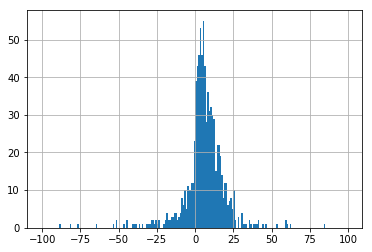

In [196]:
df[df.columns[2]].astype(float).hist(bins=range(-100,100))

In [197]:
cond1 = df['毛利率(%)(營業毛利)/(營業收入)'].astype(float) > 20
cond2 = df['營業利益率(%)(營業利益)/(營業收入)'].astype(float) > 5

In [198]:
df[cond1 & cond2]

,公司代號,毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),營業收入(百萬元),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
公司名稱,,,,,,
味王公司,1203.0,32.37,16.71,4633.52,17.09,12.47
統一,1216.0,33.69,6.38,305037.14,8.75,7.36
佳格,1227.0,28.31,10.42,19370.72,10.00,7.88
聯華實業,1229.0,21.69,10.13,3582.74,65.64,63.58
聯華食品,1231.0,20.49,5.74,5312.64,6.34,5.17
天仁,1233.0,57.20,9.80,1594.66,10.14,8.44
鮮活果汁-KY,1256.0,30.54,16.85,2405.25,16.73,10.79
綠悅-KY,1262.0,24.50,18.04,4867.23,18.48,15.59
三芳化工,1307.0,31.02,14.20,7653.07,13.16,10.35


## 每日股價爬蟲
- 上市
- 上櫃

In [4]:
def crawlPrice(date):
    r = requests.post('http://app.twse.com.tw/ch/trading/exchange/MI_INDEX/MI_INDEX.php', data={
        'download': 'csv',
        'qdate':date,
        'selectType':'ALL',
    })
    r.encoding = 'big5'
    df = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                         for i in r.text.split('\n') 
                                         if len(i.split('",')) == 16 and i[0] != '='])), header=0)
    df.set_index('證券代號', inplace=True)
    df.columns = ['證券名稱', '成交量', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價',
                  '漲跌(+/-)', '漲跌價差', '最後揭示買價', '最後揭示買量', '最後揭示賣價', '最後揭示賣量', '本益比']
    
    df['成交量'] /= 1000
    df = df.drop(['漲跌(+/-)','證券名稱','最後揭示買量','最後s揭示賣量'], axis=1)
    df = df.replace('--', np.nan)
    df = df.apply(pd.to_numeric)
    df = df.apply(pd.to_numeric)
    assert len(set(df.index)) == len(df.index)
    
    return df

In [5]:
import datetime
data = {}
n_days = 365*20
time = datetime.datetime.now()
while len(data) < n_days:
    
    # 假如日月 < 9 要補零
    month_str = str(time.month) if time.month > 9 else '0' + str(time.month)
    day_str = str(time.day) if time.day > 9 else '0' + str(time.day)
    
    # e.x 20100101
    taiwan_time_str = str(time.year - 1911) + '/' + month_str + '/' + day_str
    international_time_str = str(time.year) + month_str + day_str
    
    print('parsing', international_time_str)
    # 使用 crawPrice 爬資料
    try:
        data[international_time_str] = crawlPrice(taiwan_time_str)
        print('success!')
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
    
    # 減一天
    time -= datetime.timedelta(days=1)

parsing 20180104
fail! check the date is holiday
parsing 20180103
success!
parsing 20180102
success!
parsing 20180101
fail! check the date is holiday
parsing 20171231
fail! check the date is holiday
parsing 20171230
fail! check the date is holiday
parsing 20171229
success!
parsing 20171228
success!
parsing 20171227
success!
parsing 20171226
success!
parsing 20171225
success!
parsing 20171224
fail! check the date is holiday
parsing 20171223
fail! check the date is holiday
parsing 20171222
success!
parsing 20171221
success!
parsing 20171220
success!
parsing 20171219
success!
parsing 20171218
success!
parsing 20171217
fail! check the date is holiday
parsing 20171216
fail! check the date is holiday
parsing 20171215
success!
parsing 20171214
success!
parsing 20171213
success!
parsing 20171212
success!
parsing 20171211
success!
parsing 20171210
fail! check the date is holiday
parsing 20171209
fail! check the date is holiday
parsing 20171208
success!
parsing 20171207
success!
parsing 20171206

# 處理pickle並存入db

寫入pickle

In [1]:
import pickle 

In [3]:
# with open('twstock_daily_price.pickle','wb') as f:
#     pickle.dump(data,f)

讀出pickle

In [2]:
import os

with open('twstock_daily_price.pickle','rb') as f:
    data = pickle.load(f)

整理成dataframe

In [4]:
from tqdm import tqdm
tw_stock_list = []
for date,df in tqdm(data.items()):
    df['yyyymmdd'] = pd.to_datetime(date)
    tw_stock_list.append(df)
    

# tw_stock_df['yyyymmdd'] = tw_stock_df['']

100%|██████████| 7300/7300 [00:04<00:00, 1531.22it/s]


In [5]:
tw_stock_df = pd.concat(tw_stock_list)

In [6]:
tw_stock_df.head()

,成交量,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示賣價,本益比,yyyymmdd
證券代號,,,,,,,,,,,,
1101,19959.825,5001,737353608,36.50,37.35,36.25,37.35,0.80,37.30,37.35,20.41,2018-01-03
1102,7117.653,2307,201210179,28.30,28.40,28.10,28.40,0.20,28.35,28.40,17.75,2018-01-03
1103,608.907,217,8114960,13.45,13.45,13.25,13.30,0.15,13.30,13.35,83.13,2018-01-03
1104,332.954,147,7661292,23.00,23.05,22.90,23.00,0.00,22.95,23.00,9.96,2018-01-03
1108,288.000,76,2412320,8.40,8.40,8.35,8.35,0.05,8.36,8.40,52.19,2018-01-03


In [7]:
## 取出重要的表頭
tw_stock_df = tw_stock_df[['yyyymmdd','成交量','成交筆數','開盤價','最高價','最低價','收盤價','本益比']]
## 重置index
tw_stock_df = tw_stock_df.reset_index()

- 刪除重複的值(若未上市前,資料會重複出現上市第一天的值)

In [ ]:
# tw_stock_df = pd.read_sql('select * from ')

In [10]:
tw_stock_df2 = tw_stock_df.drop_duplicates(
        subset=['證券代號','成交量','成交筆數','開盤價','最高價','最低價','收盤價','本益比']         
    )
# tw_stock_df2.describe()

,成交量,成交筆數,開盤價,最高價,最低價,收盤價,本益比
count,2.704496e+06,2.704496e+06,2.697195e+06,2.697195e+06,2.697195e+06,2.697195e+06,2.704496e+06
mean,3.605842e+03,9.889878e+02,3.547845e+01,3.595382e+01,3.497587e+01,3.541645e+01,2.301894e+01
std,1.005974e+04,1.995880e+03,8.261303e+01,8.371249e+01,8.143244e+01,8.245345e+01,8.848911e+01
min,0.000000e+00,0.000000e+00,6.000000e-02,7.000000e-02,6.000000e-02,7.000000e-02,0.000000e+00
25%,2.002290e+02,8.700000e+01,1.160000e+01,1.180000e+01,1.145000e+01,1.160000e+01,5.520000e+00
50%,7.611070e+02,3.020000e+02,2.025000e+01,2.050000e+01,2.000000e+01,2.020000e+01,1.208000e+01
75%,2.896769e+03,1.015000e+03,3.795000e+01,3.835000e+01,3.745000e+01,3.785000e+01,1.915000e+01
max,1.947674e+06,9.889000e+04,6.000000e+03,6.075000e+03,5.955000e+03,6.000000e+03,7.166670e+03


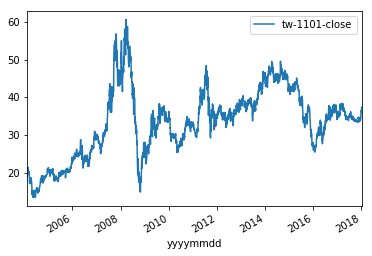

In [17]:
tw1101_price = tw_stock_df2[tw_stock_df2['證券代號'] == '1101']
tw1101_price_close = tw1101_price[['收盤價','yyyymmdd']]
tw1101_price_close = tw1101_price_close.set_index('yyyymmdd')
tw1101_price_close.columns = ['tw-1101-close']
tw1101_price_close.plot()

In [21]:
# import sqlite3
# con = sqlite3.connect('tw_stock.db')
# tw_stock_df2.to_sql('TPEx_list_daily_price',con,index=False)

In [27]:
# del tw_stock_list

In [13]:
import sqlite3
con = sqlite3.connect('tw_stock.db')
tw_stock = pd.read_sql_query('select * from TPEx_list_daily_price',con)

In [43]:
tw_stock['yyyymmdd'] = pd.to_datetime(tw_stock['yyyymmdd'])

In [44]:
close = tw_stock[['證券代號','收盤價','yyyymmdd']]
close = close.set_index('yyyymmdd')

In [64]:
ids = ['1312','1101']
twl_price = close[close['證券代號'].isin(ids)].truncate(after='2016')
# twl_price.truncate(after='2017')['收盤價'].plot()

In [90]:
twl_price.groupby(['yyyymmdd','證券代號']).max().unstack().head()

收盤價      
證券代號         1101  1312
yyyymmdd               
2016-01-04  26.15  15.2
2016-01-05  26.40  15.4
2016-01-06  26.05  15.1
2016-01-07  27.35  14.3
2016-01-08  27.00  14.5

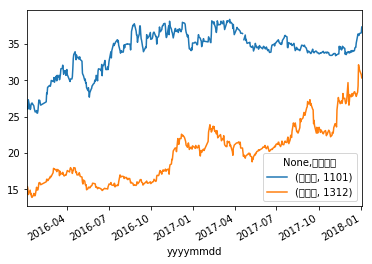

In [91]:
twl_price.groupby(['yyyymmdd','證券代號']).max().unstack().plot()

____

In [135]:
def insertDataFrameToDb(df,con,tablename):
    """
    df: dataframe to be inserted 
    con: pypyodbc connection
    """
    print('更改pd.nan --> None')
    
    df = df.where(pd.notnull(df), None)
    print('塞入資料...')
    cursor = con.cursor()
    idx = 0
    for row_series in df.iterrows():
        idx += 1
        row_dict = {k:v for k,v in row_series[1].items()}
        col,val = list(zip(*row_dict.items()))
        sql_insert = """INSERT INTO {0}({1}) VALUES ({2})"""
        num_quest = '?' + ',?'*(len(row_dict)-1)
        cols_bracket = ['[' + e +']' for e in col]
        fields = ','.join(cols_bracket)
        sql_insert.format(tablename,fields,num_quest)
                
        try:
            cursor.execute(sql_insert.format(tablename,fields,num_quest),val)
        except pypyodbc.IntegrityError as e:
            print('data exist!!',row_dict)
            continue
        except pypyodbc.DataError as e:
            print('data db schema error',row_dict)
        if idx % 1000 == 0 :
            print('insert {} data'.format(idx))
            cursor.commit()
    cursor.commit()    

In [137]:
import pypyodbc 
con = pypyodbc.connect("DRIVER={SQL Server};SERVER=dbm_public;UID=sa;PWD=01060728;DATABASE=External")


In [20]:
insertDataFrameToDb(tw_stock_df,con,'twstock_daily_price')

更改pd.nan --> None
塞入資料...


In [221]:
close = pd.DataFrame({k:d['收盤價'] for k,d in data.items()}).transpose()
close.index = pd.to_datetime(close.index)

In [213]:
close.iloc[0:10]

2017-11-22    34.70
2017-11-23    34.50
2017-11-24    34.55
2017-11-27    34.40
2017-11-28    33.60
2017-11-29    33.90
2017-11-30    33.55
2017-12-01    33.70
2017-12-04    33.95
2017-12-05    33.95
Name: 1101, dtype: float64

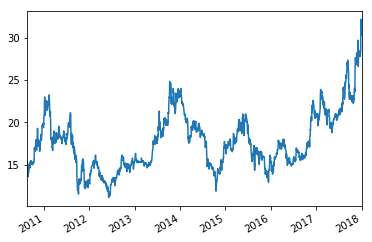

In [229]:
close['1312'].plot()

## 回測

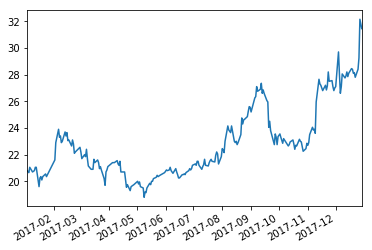

In [230]:
close['1312'].truncate('20170101','20171231').plot()

In [308]:
c = close.truncate('20100101','20151231')
dropdown = (c.cummax()-c).max()/c.max()*100 ## 一年最大下跌幅度
profit = (c.iloc[-1]/c.iloc[0] -1) * 100 ## 計算近n年報酬率
std = (c/c.shift()).std() * 200 ## 波動率

In [309]:
## 策略選擇
constraint = (std[std<2].index &
             profit[profit>10].index &
             dropdown[dropdown<50].index)

買了7支股票


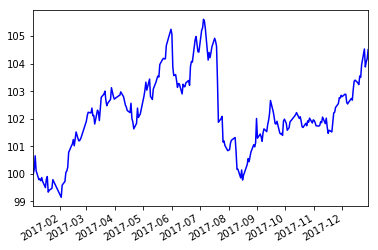

In [310]:
## backtest
start_capital = 100
c2 = close.truncate('20170101','20180101')
selected_stocks = constraint & c2.columns
print('買了{}支股票'.format(len(selected_stocks)))
# 回測
equality = c2[selected_stocks].dropna(axis=1).mean(axis=1)
total_equality = (equality / equality[0] * start_capital)
total_equality.plot(color='blue')
# 今年底的資產，變成明年初的資產
start_capital = total_equality[-1]